## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

# 作業1。
- Ans: max_depth=2開始，Acuuracy不變。另一方面，從Feature importance可看出每一層的特徵重要性，可進一步做特徵選取。

#### test_size=0.25, max_depth= 4
#### entropy: 
* Acuuracy:  0.9736842105263158
* Feature importance:  [0.01796599 0.         0.52229134 0.45974266]

#### gini: 
* Acuuracy:  0.9736842105263158
* Feature importance:  [0.         0.01796599 0.05992368 0.92211033]

#### test_size=0.25, max_depth= 3
#### entropy: 
* Acuuracy:  0.9736842105263158
* Feature importance:  [0.         0.         0.55828357 0.44171643]

#### gini: 
* Acuuracy:  0.9736842105263158
* Feature importance:  [0.         0.         0.55828357 0.44171643]


### test_size=0.25, max_depth= 2
#### entropy: 
* Acuuracy:  0.9736842105263158
* Feature importance:  [0. 0. 0. 1.]

#### gini: 
* Acuuracy:  0.9736842105263158
* Feature importance:  [0.         0.         0.52805393 0.47194607]

### test_size=0.25, max_depth= 1
#### entropy: 
* Acuuracy:  0.6842105263157895
* Feature importance:  [0. 0. 0. 1.]

#### gini: 
* Acuuracy:  0.6842105263157895
* Feature importance:  [0. 0. 1. 0.]

# 作業２

In [1]:
from sklearn import datasets, metrics, tree

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import warnings
warnings.filterwarnings("ignore")

# 波斯頓房價資料集

In [2]:
# 讀取波斯頓房價資料集
boston = datasets.load_boston()

# 波斯頓房價資料集為回歸模型
#boston.target
#boston.DESCR

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

In [3]:
clf = DecisionTreeRegressor(criterion='mse', max_depth=7)
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test,y_test)
print("Score: ", score)

Score:  0.7259065446585751


In [4]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [7.40575600e-02 7.65299432e-04 7.97908812e-03 0.00000000e+00
 2.97699333e-02 5.58763910e-01 9.63311521e-03 5.55674775e-02
 3.33355964e-04 7.89232707e-03 1.77027147e-02 5.84921842e-03
 2.31686001e-01]


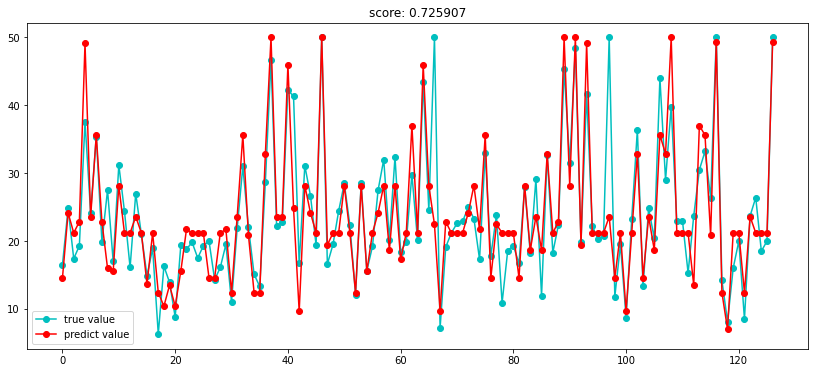

In [5]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(len(y_pred)), y_test,'go-', label='true value', color = 'c')
plt.plot(np.arange(len(y_pred)), y_pred,'ro-', label='predict value', color = 'r')

plt.title('score: %f'%score)
plt.legend()
plt.show()

# 紅酒資料集

In [6]:
# 讀取紅酒資料集
wine = datasets.load_wine()

# 紅酒資料集確定是分類
# print(wine.DESCR)
# wine.target_names

In [7]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

In [8]:
# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
#clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [9]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9555555555555556


In [10]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.01794699 0.         0.         0.         0.01571782
 0.41359716 0.         0.         0.2188998  0.         0.
 0.33383822]


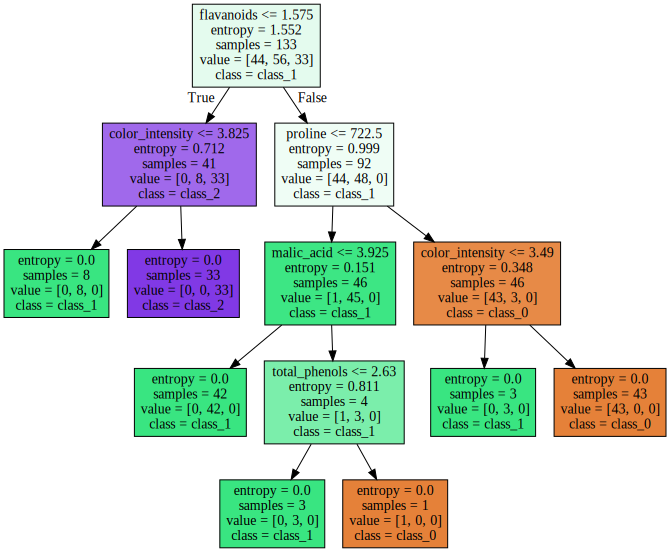

In [11]:
data = tree.export_graphviz(clf,out_file=None,feature_names=wine.feature_names,class_names=wine.target_names,filled=True)
graph = graphviz.Source(data)
graph